# Datamart Analítico

## Set Up

In [473]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlalchemy as sa

%config IPCompleter.greedy = True

## Carga de Datasets

In [474]:
listings = pd.read_pickle('../Datos/listings.pickle')
listings_det = pd.read_pickle('../Datos/listings_det.pickle')

Finalmente tenemos dos tablas principales:

* listings
* listings_det

Sabemos que ambas comparten la variable 'id', por lo que podemos cruzarlas a partir de esa variable.

La tabla que vamos a utilizar como principal es listings, ya que listings_det solo nos aporta datos adicionales de cada registro.

In [475]:
listings.shape

(5249, 10)

In [476]:
listings_det.shape

(7844, 4)

## Unión de Datasets

### Left join de las tablas

Unimos ambas tablas y creamos una única llamada df

In [477]:
df = pd.merge(left = listings, right = listings_det, how = 'left', on = 'id')
print(df.shape)
df.head(3)

(5249, 14)


,id,host_id,distrito,barrio,latitude,longitude,tipo_alquiler,minimo_noches,total_inmuebles_host,disponibilidad_365,precio,accommodates,bedrooms,beds
0,48154,219476,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,3,4,150,117.50,4,2.0,2.0
1,137143,670775,POBLATS DEL SUD,EL SALER,39.36335,-0.31932,Entire home/apt,10,5,30,408.25,7,1.0,14.0
2,149715,5947,POBLATS MARITIMS,CABANYAL-CANYAMELAR,39.46746,-0.32813,Entire home/apt,2,1,304,269.00,10,5.0,7.0


Finalmente tenemos una tabla con 5.249 resgistros y 14 variables

### Tabla df_cliente

Es el momento de extraer los inmuebles de la empresa que nos propone el estudio.

Para ello, vamos a localizar el host_id de la empresa.

Accedemos a la tabla sep25 donde teníamos la variable host_id y localizamos el número de host que nos ha proporcionado la empresa '439630774'

Creamos df_propios con los imbuebles de la empresa

In [478]:
host_id_cliente = 439630774

In [479]:
df_cliente = df[df['host_id'] == host_id_cliente].copy()
print(df_cliente.shape)
df_cliente

(16, 14)


,id,host_id,distrito,barrio,latitude,longitude,tipo_alquiler,minimo_noches,total_inmuebles_host,disponibilidad_365,precio,accommodates,bedrooms,beds
1647,54220649,439630774,LA SAIDIA,TORMOS,39.488280,-0.380240,Entire home/apt,2,16,319,67.666667,3,1.0,2.0
1950,674938867045217998,439630774,LA SAIDIA,TORMOS,39.487720,-0.379680,Entire home/apt,2,16,339,71.500000,3,1.0,2.0
2037,728923357550786379,439630774,JESUS,SANT MARCEL.LI,39.447440,-0.391240,Entire home/apt,2,16,360,69.000000,3,1.0,2.0
2038,728931005416548497,439630774,JESUS,CAMI REAL,39.447520,-0.392730,Entire home/apt,2,16,355,74.750000,3,1.0,2.0
2041,731830316592211463,439630774,JESUS,CAMI REAL,39.445670,-0.393130,Entire home/apt,2,16,318,82.333333,3,1.0,2.0
2204,818549269734561878,439630774,JESUS,SANT MARCEL.LI,39.443087,-0.393127,Entire home/apt,2,16,329,69.000000,2,1.0,1.0
2252,840531769713442727,439630774,PATRAIX,SANT ISIDRE,39.450790,-0.403170,Entire home/apt,2,16,348,77.250000,3,1.0,3.0
2413,900712969289655264,439630774,ALGIROS,L'AMISTAT,39.471532,-0.350437,Entire home/apt,2,16,334,81.500000,3,1.0,2.0
2548,933385516867765128,439630774,JESUS,SANT MARCEL.LI,39.443295,-0.390208,Entire home/apt,2,16,313,70.250000,3,1.0,2.0
2549,933417004682164891,439630774,JESUS,SANT MARCEL.LI,39.444710,-0.390400,Entire home/apt,2,16,343,78.250000,3,1.0,2.0


La empresa tiene un total de 16 inmuebles repartidos por la ciudad de Valencia

Para hacernos una idea visual de dónde se encuentran, vamos a visualizarlos en un mapa

In [480]:
import folium

In [481]:
fig = folium.Figure(width=500, height=350) 
mapa = folium.Map(location=[39.4699, -0.3763], zoom_start=12)
mapa.add_to(fig)

for piso in range(len(df_cliente)):
    folium.Marker(
        location=[df_cliente.iloc[piso]['latitude'], df_cliente.iloc[piso]['longitude']],
        popup=df_cliente.iloc[piso]['precio'],
    ).add_to(mapa)

mapa

### Tabla df

Para realizar un análisis correcto, debemos extraer los inmuebles propios del data frame de análisis.

In [482]:
df = df[df['host_id'] != host_id_cliente].copy()
print(df.shape)
df.head(3)

(5233, 14)


,id,host_id,distrito,barrio,latitude,longitude,tipo_alquiler,minimo_noches,total_inmuebles_host,disponibilidad_365,precio,accommodates,bedrooms,beds
0,48154,219476,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,3,4,150,117.50,4,2.0,2.0
1,137143,670775,POBLATS DEL SUD,EL SALER,39.36335,-0.31932,Entire home/apt,10,5,30,408.25,7,1.0,14.0
2,149715,5947,POBLATS MARITIMS,CABANYAL-CANYAMELAR,39.46746,-0.32813,Entire home/apt,2,1,304,269.00,10,5.0,7.0


Como hemos visto en el mapa anterior, los inmuebles de la empresa que nos solicita el análisis no se encuentran en la zona de la costa.

Consideramos que la distancia a la playa es un sesgo que influye mucho en el precio del alquiler. Ya que ninguno de los inmuebles de nuestra empresa se encuentra en la playa, determinamos que vamos a quitar los inmuebles que se encuentren en los barrios de 'POBLATS MARITIMS' y 'POBLATS DEL SUD'

In [483]:
df = df[~df['distrito'].isin(['POBLATS MARITIMS','POBLATS DEL SUD'])].copy()

In [484]:
print(df.shape)
df.head(3)

(4098, 14)


,id,host_id,distrito,barrio,latitude,longitude,tipo_alquiler,minimo_noches,total_inmuebles_host,disponibilidad_365,precio,accommodates,bedrooms,beds
0,48154,219476,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,3,4,150,117.50,4,2.0,2.0
3,165971,791187,EXTRAMURS,LA ROQUETA,39.46790,-0.38206,Entire home/apt,5,7,29,145.25,4,1.0,1.0
4,182221,1315567,CAMINS AL GRAU,AIORA,39.46343,-0.34325,Entire home/apt,3,1,176,745.00,5,2.0,5.0


## Creación de Variables

### Variables "Mercado" y "Cliente"

Añadimos las constantes 'mercado' y 'propio' a cada inmueble simplemente para facilitar su análisis posteriormente

In [485]:
df['tipo_fuente'] = 'Mercado'
df_cliente['tipo_fuente'] = 'Cliente'

### Variable distancia_centro

Vamos a crear una variable en la que calculemos la distancia de cada registro a un punto de interés.

En nuestro caso, consideramos como punto de interés el centro de la ciudad de Valencia:

* Plaza del Ayuntamiento (centro de la ciudad)\
Coordenadas: 39.4698 / -0.376364


Para poder calcular las distancias entre los puntos debemos tener en cuenta la curbatura de la tierra. 

La fórmula que debemos utilizar se llama Heversine y la calculamos con la siguiente función:

In [486]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6372.8 #En km

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

#### Añadimos las variables a df

Creamos y añadimos la variable que calcule la distancia a la Plaza del Ayuntamiento de cada registro de df

In [487]:
lat1 = 39.4698
lon1 = -0.376364

df['dis_centro'] = df.apply(lambda registro: haversine(lat1,lon1,registro.latitude,registro.longitude),axis = 1)

In [488]:
print(df.shape)
df.head(3)

(4098, 16)


,id,host_id,distrito,barrio,latitude,longitude,tipo_alquiler,minimo_noches,total_inmuebles_host,disponibilidad_365,precio,accommodates,bedrooms,beds,tipo_fuente,dis_centro
0,48154,219476,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,3,4,150,117.50,4,2.0,2.0,Mercado,1.555892
3,165971,791187,EXTRAMURS,LA ROQUETA,39.46790,-0.38206,Entire home/apt,5,7,29,145.25,4,1.0,1.0,Mercado,0.532783
4,182221,1315567,CAMINS AL GRAU,AIORA,39.46343,-0.34325,Entire home/apt,3,1,176,745.00,5,2.0,5.0,Mercado,2.930317


In [489]:
df.groupby('distrito', observed=True)['dis_centro'].mean().sort_values()

distrito
CIUTAT VELLA         0.638681
EXTRAMURS            0.920632
L'EIXAMPLE           0.961343
EL PLA DEL REAL      1.657427
PATRAIX              1.696307
LA SAIDIA            1.806978
JESUS                1.868823
QUATRE CARRERES      1.915001
L'OLIVERETA          2.071361
CAMPANAR             2.188987
BENIMACLET           2.235667
CAMINS AL GRAU       2.638918
RASCANYA             2.674943
ALGIROS              2.686621
BENICALAP            3.014716
POBLATS DE L'OEST    4.719944
POBLATS DEL NORD     6.291123
Name: dis_centro, dtype: float64

Comprobamos que las distancias tienen sentido, ya que conocemos los barrios de Valencia.

Vamos a realizar un primer análisis gráfico si existe relación entre el precio y la distancia al centro

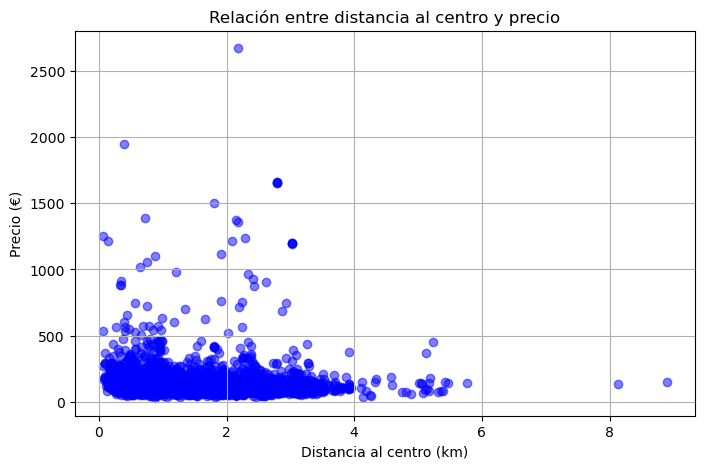

In [490]:
plt.figure(figsize=(8, 5))
plt.scatter(df['dis_centro'], df['precio'], alpha=0.5, color='blue')
plt.xlabel('Distancia al centro (km)')
plt.ylabel('Precio (€)')
plt.title('Relación entre distancia al centro y precio')
plt.grid(True)
plt.show()

Dadas las características de la ciudad de Valencia, podemos ver que la mayoría de los pisos se concentran entre 0 y 4 km.

Una de las conclusiones a las que podemos llegar con este gráfico es que, a partir de los 5km de distancia al centro, la posibilidad de sacar mayor rendimiento al inmueble subiendo el precio es más complicado, ya que podemos ver cómo la dispersión en precio disminuye conforme nos alejamos del centro de la ciudad.

#### Añadimos la variable a df_propios

Ahora vamos a añadir dis_centro al data frame df_propios

In [491]:
lat1 = 39.4698
lon1 = -0.376364

df_cliente['dis_centro'] = df_cliente.apply(lambda registro: haversine(lat1,lon1,registro.latitude,registro.longitude),axis = 1)
print(df_cliente.shape)
df.head(3)

(16, 16)


,id,host_id,distrito,barrio,latitude,longitude,tipo_alquiler,minimo_noches,total_inmuebles_host,disponibilidad_365,precio,accommodates,bedrooms,beds,tipo_fuente,dis_centro
0,48154,219476,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,3,4,150,117.50,4,2.0,2.0,Mercado,1.555892
3,165971,791187,EXTRAMURS,LA ROQUETA,39.46790,-0.38206,Entire home/apt,5,7,29,145.25,4,1.0,1.0,Mercado,0.532783
4,182221,1315567,CAMINS AL GRAU,AIORA,39.46343,-0.34325,Entire home/apt,3,1,176,745.00,5,2.0,5.0,Mercado,2.930317


### Variable precio_persona

Otra variable que nos puede ayudar a nuestro análisis es el precio por persona de cada inmueble

In [492]:
df['precio_persona'] = df['precio']/df['accommodates']

In [493]:
df.head(3)

,id,host_id,distrito,barrio,latitude,longitude,tipo_alquiler,minimo_noches,total_inmuebles_host,disponibilidad_365,precio,accommodates,bedrooms,beds,tipo_fuente,dis_centro,precio_persona
0,48154,219476,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,3,4,150,117.50,4,2.0,2.0,Mercado,1.555892,29.3750
3,165971,791187,EXTRAMURS,LA ROQUETA,39.46790,-0.38206,Entire home/apt,5,7,29,145.25,4,1.0,1.0,Mercado,0.532783,36.3125
4,182221,1315567,CAMINS AL GRAU,AIORA,39.46343,-0.34325,Entire home/apt,3,1,176,745.00,5,2.0,5.0,Mercado,2.930317,149.0000


## KPIs

En este punto creamos las variables de análisis, es decir, las que habíamos indentificado como KPIs que usaremos para determinar si los precios de los inmuebles propios se podrían ajustar teniendo en cuenta los de la competencia con características similares.

Para ello vamos a realizar lo siguiente:
- Primero realizaremos una segmentación de la variable dis_centro para luego realizar una comparación de precio de los inmuebles según esta variable
- En segundo lugar nos centraremos en la variable accommodates y sacaremos la diferencia de precio de los inmuebles según este parámetro
- Por último compararemos los emprecios de nuestros inmuebles con los inmuebles del mercado que combinen las dos variables anteriores

### KPI - Diferencia precio según dis_centro

Antes de empezar la segmentación de la variable dis_centro, creemos que será útil ver una representación gráfica de los inmuebles propios (en rojo) con respecto a la competencia (azul), según su precio y su distancia al centro

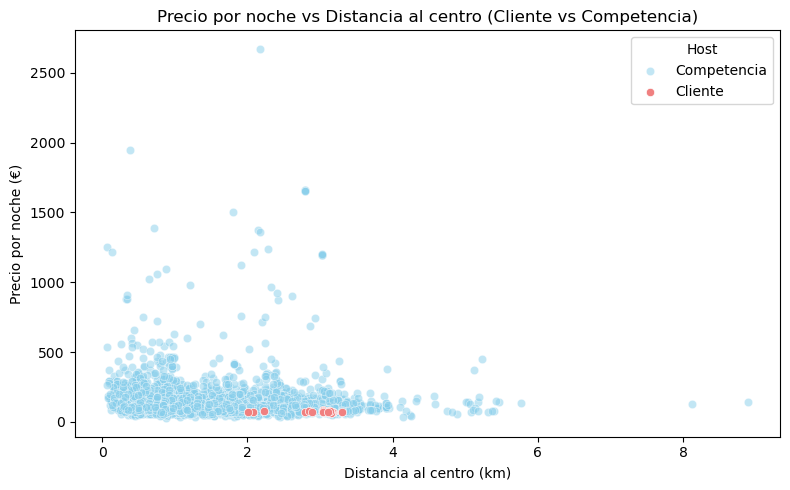

In [494]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df,
    x='dis_centro',
    y='precio',
    color='skyblue',
    alpha=0.5,
    label='Competencia'
)

sns.scatterplot(
    data=df_cliente,
    x='dis_centro',
    y='precio',
    color='lightcoral',
    alpha=1,
    label='Cliente'
)

plt.title('Precio por noche vs Distancia al centro (Cliente vs Competencia)')
plt.xlabel('Distancia al centro (km)')
plt.ylabel('Precio por noche (€)')
plt.legend(title='Host')
plt.tight_layout()
plt.show()

Observando el gráfico anterior podríamos sacar alguna de las primeras conclusiones, y es que, todo apunta, a que los precios de los inmuebles propios se encuentra en la parte baja del rango de dispersión del precio/noche.

Vamos ahora a determinar la cuantía en euros de esa diferencia.

Lo primero será realizar una segmentación de los inmuebles por su distancia en km al centro

In [495]:
bins = [0, 2, 4, float('inf')]
etiquetas = ['0-2km', '2-4km', '>4km']

df['segmento_distancia'] = pd.cut(df['dis_centro'], bins=bins, labels=etiquetas, right=False)
df_cliente['segmento_distancia'] = pd.cut(df_cliente['dis_centro'], bins=bins, labels=etiquetas, right=False)

Una vez realizada la segmentación vemos el número de inmuebles que tenemos en cada uno

In [496]:
print("Competencia: df")
display(df['segmento_distancia'].value_counts().sort_index())

print("\nCliente: df_cliente")
display(df_cliente['segmento_distancia'].value_counts().sort_index())

Competencia: df


segmento_distancia
0-2km    2922
2-4km    1144
>4km       32
Name: count, dtype: int64


Cliente: df_cliente


segmento_distancia
0-2km     0
2-4km    16
>4km      0
Name: count, dtype: int64

#### KPI_km

Observamos que los inmuebles propios solo se encuentran en la segmentación de 2-4km por lo que vamos a sacar la relación de inmuebles de df que se encuentran en ese rango

In [497]:
df_filtrado_km = df[df['segmento_distancia'] == '2-4km']
print(df_filtrado_km.shape)
df.head(3)

(1144, 18)


,id,host_id,distrito,barrio,latitude,longitude,tipo_alquiler,minimo_noches,total_inmuebles_host,disponibilidad_365,precio,accommodates,bedrooms,beds,tipo_fuente,dis_centro,precio_persona,segmento_distancia
0,48154,219476,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,3,4,150,117.50,4,2.0,2.0,Mercado,1.555892,29.3750,0-2km
3,165971,791187,EXTRAMURS,LA ROQUETA,39.46790,-0.38206,Entire home/apt,5,7,29,145.25,4,1.0,1.0,Mercado,0.532783,36.3125,0-2km
4,182221,1315567,CAMINS AL GRAU,AIORA,39.46343,-0.34325,Entire home/apt,3,1,176,745.00,5,2.0,5.0,Mercado,2.930317,149.0000,2-4km


In [498]:
print("Competencia:")
display(df_filtrado_km.groupby('segmento_distancia', observed=True)['precio'].agg(['mean', 'count']))
print("Cliente:")
df_cliente.groupby('segmento_distancia',  observed=True)['precio'].agg(['mean', 'count'])

Competencia:


,mean,count
segmento_distancia,,
2-4km,139.108683,1144


Cliente:


,mean,count
segmento_distancia,,
2-4km,72.614583,16


Podemos observar que la diferencia del precio medio es bastante notoria, ya que el del cliente es de 72,61€/noche y el del la competencia es de 139,10€/noche, lo que representa una diferencia de más de un 90% entre ambos.

Vamos a sacar el KPI que nos indique exáctamente cuál es la diferencia de precio entre los inmuebles de la competencia y los propios que se encuentra en el mismo segmento de distancia al centro

In [499]:
pmedio_competencia_km = df_filtrado_km.groupby('segmento_distancia', observed=True )['precio'].mean()
pmedio_cliente_km = df_cliente.groupby('segmento_distancia', observed = True)['precio'].mean()
kpi_km = pmedio_competencia_km.iloc[0] - pmedio_cliente_km.iloc[0]
print(f'El KPI diferencia precio según los km al centro es de {kpi_km:.2f} euros')

El KPI diferencia precio según los km al centro es de 66.49 euros


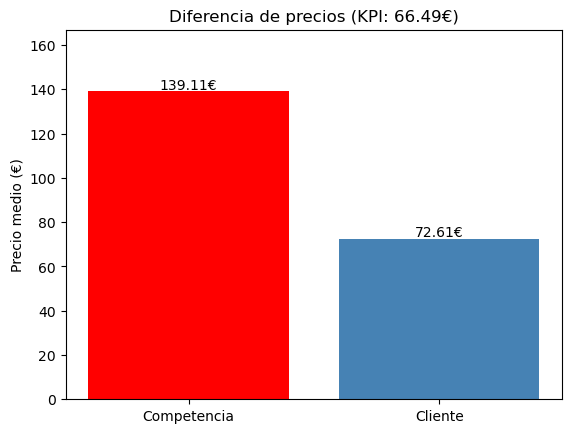

In [500]:
import matplotlib.pyplot as plt

valores_km = [pmedio_competencia_km.iloc[0], pmedio_cliente_km.iloc[0]]
etiquetas = ['Competencia', 'Cliente']

plt.bar(etiquetas, valores_km, color=['red', 'steelblue'])
plt.title(f'Diferencia de precios (KPI: {kpi_km:.2f}€)')
plt.ylabel('Precio medio (€)')
plt.ylim(0, max(valores_km) * 1.2)

# Opcional: anotar los valores en las barras
for i, v in enumerate(valores_km):
    plt.text(i, v + 1, f'{v:.2f}€', ha='center')

plt.show()

### KPI - Diferencia precio según accommodates

La variable accommodates es una de las variables que consideramos más importantes en nuestro análisis, ya que indica el número de personas máxima que se puede alojar en el inmueble alquilado.

En primer lugar vamos a ver qué número de accommodates tienen los inmuebles propios

In [501]:
df_cliente.groupby('accommodates')['accommodates'].count()

accommodates
2     1
3    15
Name: accommodates, dtype: int64

Vemos que de los 16 inmuebles propios, 15 tienen un accommodates de 3, por lo que vamos a centrar el análisis en este número de accommodates.

#### KPI_acc

Filtramos el df principal para solo quedarnos con los inmuebles que tengan 3 accommodates y sacamos el precio medio.

In [502]:
df_filtrado_acc = df[df['accommodates'] == 3]

print('Competencia:')
pmedio_competencia_acc = df_filtrado_acc.groupby('accommodates')['precio'].agg(['mean', 'count'])
display(pmedio_competencia_acc)

print('\nCliente:')
pmedio_cliente_acc = df_cliente[df_cliente['accommodates'] == 3].groupby('accommodates')['precio'].agg(['mean', 'count'])
pmedio_cliente_acc

Competencia:


,mean,count
accommodates,,
3,114.360766,483



Cliente:


,mean,count
accommodates,,
3,72.855556,15


In [503]:
pmedio_competencia_acc = df_filtrado_acc.groupby('accommodates')['precio'].mean()
pmedio_propios_acc = df_cliente[df_cliente['accommodates'] == 3].groupby('accommodates')['precio'].mean()
kpi_acc = pmedio_competencia_acc.iloc[0] - pmedio_propios_acc.iloc[0]

print(f'El KPI diferencia precio según los km al centro es de {kpi_acc:.2f} euros')

El KPI diferencia precio según los km al centro es de 41.51 euros


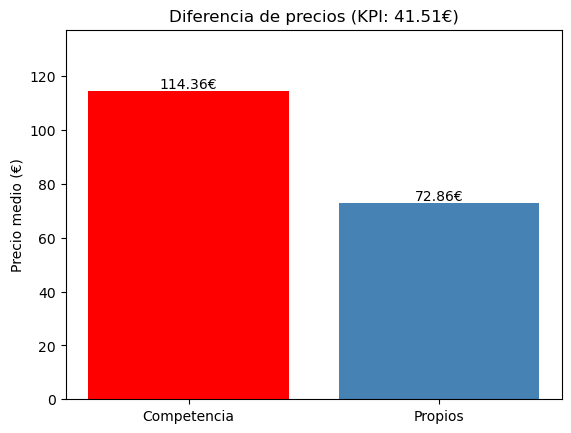

In [504]:
valores_acc = [pmedio_competencia_acc.iloc[0], pmedio_propios_acc.iloc[0]]
etiquetas = ['Competencia', 'Propios']

plt.bar(etiquetas, valores_acc, color=['red', 'steelblue'])
plt.title(f'Diferencia de precios (KPI: {kpi_acc:.2f}€)')
plt.ylabel('Precio medio (€)')
plt.ylim(0, max(valores_acc) * 1.2)

for i, v in enumerate(valores_acc):
    plt.text(i, v + 1, f'{v:.2f}€', ha='center')

plt.show()


### KPI - Diferencia precio según dis_centro & accommodates

Como hemos visto, los inmuebles propios se encuentran solo entre; los segmentos de distancia 2-3km y 3-4km; y con 2 o 3 accommodates.

Filtramos entre estos segmentos para el df y así solo comparamos con los inmuebles que cumplen esos requisitos

#### KPI_km_acc

In [505]:
# Filtramos los accommodates de 3 y por el segmento 2-4km
df_filtrado_acc_km = df[(df['accommodates'] == 3) & (df['segmento_distancia'] == '2-4km')]
display(df_filtrado_acc_km.groupby(['segmento_distancia', 'accommodates'],observed=True)['precio'].agg(['mean','count']))
display(df_cliente[df_cliente['accommodates'] == 3].groupby(['segmento_distancia', 'accommodates'],observed=True)['precio'].agg(['mean', 'count']))

,,mean,count
segmento_distancia,accommodates,,
2-4km,3,118.129704,124


,,mean,count
segmento_distancia,accommodates,,
2-4km,3,72.855556,15


In [506]:
df_filtrado_acc_km = df[(df['accommodates'].isin([2,3])) & (df['segmento_distancia'] == '2-4km')]
pmedio_competencia_acc_km = df_filtrado_acc_km.groupby(['segmento_distancia', 'accommodates'],observed=True)['precio'].mean()
pmedio_cliente_acc_km = df_cliente.groupby(['segmento_distancia', 'accommodates'],observed=True)['precio'].mean()

kpi_km_acc = pmedio_competencia_acc_km.iloc[0] - pmedio_cliente_acc_km.iloc[0]

print(f'El KPI diferencia precio según los km al centro 2-4km y accommodates igual a 3 es de {kpi_km_acc:.2f} euros')

El KPI diferencia precio según los km al centro 2-4km y accommodates igual a 3 es de 36.76 euros


## Juntamos df y df_cliente

In [507]:
df_total = pd.concat([df, df_cliente], ignore_index=True)

In [508]:
# Reordenamos las variables
columnas_orden = [
    "id", "host_id", "distrito", "barrio", "tipo_alquiler", "precio",
    "accommodates", "bedrooms", "beds", "minimo_noches",
    "total_inmuebles_host", "disponibilidad_365", "dis_centro",
    "tipo_fuente", "latitude", "longitude"
]

In [509]:
df_total = df_total[[c for c in columnas_orden if c in df_total.columns]]

In [510]:
print("Shape final:", df_total.shape)
print("\nTipos de datos:")
print(df_total.dtypes)

Shape final: (4114, 16)

Tipos de datos:
id                         int64
host_id                    int64
distrito                category
barrio                  category
tipo_alquiler           category
precio                   float64
accommodates               int64
bedrooms                 float64
beds                     float64
minimo_noches              int64
total_inmuebles_host       int64
disponibilidad_365         int64
dis_centro               float64
tipo_fuente               object
latitude                 float64
longitude                float64
dtype: object


## Guardamos Datamart final

In [511]:
# Como pickle
df_total.to_pickle('../Datos/datamart_final.pickle')

# Como csv para su posterior análisis fuera de Jupyter
df_total.to_csv("../Datos/datamart_final.csv",
                index=False,
                encoding="utf-8-sig")